<a href="https://colab.research.google.com/github/JulioHenri/Trabalho-de-conclusao-de-curso/blob/main/tcc_ML_anos_separados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_excel('kids_10_19.xlsx')
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,MUNIC_RES,NASC,SEXO,MARCA_UTI,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,RACA_COR,years_old,Grupo,Grupo_Nome,Grupon,ICSAP,CODMUNNEW,NOME_MUNIC,ID_RM,CODMESO,MESORREGIAO,MESO
0,150000,2010,3,7,150010,20080721,3,0,0,4,4,317.4,39.5,356.9,0.0,207.50,20100110.0,20100114.0,A049,NaN,150010.0,4.0,1.0,4.0,0.0,3.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
1,150000,2010,3,7,150010,20090204,1,0,0,5,5,325.4,39.5,364.9,0.0,212.15,20100107.0,20100112.0,A049,NaN,150010.0,3.0,11.0,5.0,0.0,99.0,1,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
2,150000,2010,3,7,150010,20080814,1,0,0,4,4,317.4,39.5,356.9,0.0,207.50,20100131.0,20100204.0,A049,NaN,150010.0,4.0,1.0,4.0,0.0,99.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
3,150000,2010,5,7,150010,20081027,3,0,0,5,5,325.4,39.5,364.9,0.0,202.72,20100326.0,20100331.0,A049,NaN,150010.0,4.0,1.0,5.0,0.0,99.0,2,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4
4,150000,2010,6,7,150010,20090804,3,0,0,4,4,317.4,39.5,356.9,0.0,203.94,20100307.0,20100311.0,A049,NaN,150010.0,3.0,7.0,4.0,0.0,3.0,1,II,Gastroenterites Infecciosas e complicações,3,1.0,1500107,Abaetetuba,NaN,1504.0,Nordeste Paraense,4


In [ ]:
df = df.drop(23192) #dropando linha com muitos null values
df = df.drop(['MES_CMPT', 'ESPEC', 'UTI_INT_TO', 'DIAR_ACOM',
       'QT_DIARIAS', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI', 'US_TOT',
       'DT_INTER', 'DT_SAIDA', 'DIAG_SECUN', 'Grupo', 'Grupo_Nome','CODMUNNEW',
        'NOME_MUNIC', 'MESORREGIAO','ID_RM','Grupon'], axis=1) #excluindo variáveis desnecessárias 

x = df.drop(['ICSAP','DIAG_PRINC','UF_ZI','MUNIC_RES','NASC','MARCA_UTI',
             'COD_IDADE','CODMESO','IDADE','MUNIC_MOV','RACA_COR'],axis=1)
y = df['ICSAP'] 

##separando por ano

In [ ]:
df.ANO_CMPT.unique() #valores unicos desse variavel

array([2010, 2019])

In [ ]:
df_2010 = df.query('ANO_CMPT==2010')
df_2010.head()

,UF_ZI,ANO_CMPT,MUNIC_RES,NASC,SEXO,MARCA_UTI,DIAG_PRINC,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,RACA_COR,years_old,ICSAP,CODMESO,MESO
0,150000,2010,150010,20080721,3,0,A049,150010.0,4.0,1.0,4.0,0.0,3.0,2,1.0,1504.0,4
1,150000,2010,150010,20090204,1,0,A049,150010.0,3.0,11.0,5.0,0.0,99.0,1,1.0,1504.0,4
2,150000,2010,150010,20080814,1,0,A049,150010.0,4.0,1.0,4.0,0.0,99.0,2,1.0,1504.0,4
3,150000,2010,150010,20081027,3,0,A049,150010.0,4.0,1.0,5.0,0.0,99.0,2,1.0,1504.0,4
4,150000,2010,150010,20090804,3,0,A049,150010.0,3.0,7.0,4.0,0.0,3.0,1,1.0,1504.0,4


In [ ]:
x_2010 = df_2010.drop(['ICSAP','DIAG_PRINC','UF_ZI','MUNIC_RES','NASC','MARCA_UTI',
             'COD_IDADE','CODMESO','IDADE','MUNIC_MOV','RACA_COR'],axis=1)
y_2010 = df_2010['ICSAP'] 

In [ ]:
df_2019 = df.query('ANO_CMPT==2019')
df_2019.head()

,UF_ZI,ANO_CMPT,MUNIC_RES,NASC,SEXO,MARCA_UTI,DIAG_PRINC,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,RACA_COR,years_old,ICSAP,CODMESO,MESO
19689,150000,2019,150010,20171003,3,0,A010,150010.0,4.0,1.0,10.0,0.0,3.0,2,1.0,1504.0,4
19690,150000,2019,150010,20151215,3,0,A010,150010.0,4.0,3.0,8.0,0.0,3.0,4,1.0,1504.0,4
19691,150000,2019,150010,20141107,3,0,A049,150010.0,4.0,4.0,6.0,0.0,3.0,5,1.0,1504.0,4
19692,150000,2019,150010,20170924,3,0,A049,150010.0,4.0,1.0,21.0,0.0,3.0,2,1.0,1504.0,4
19693,150000,2019,150010,20170527,3,0,A049,150010.0,4.0,1.0,4.0,0.0,3.0,2,1.0,1504.0,4


In [ ]:
x_2019 = df_2019.drop(['ICSAP','DIAG_PRINC','UF_ZI','MUNIC_RES','NASC','MARCA_UTI',
             'COD_IDADE','CODMESO','IDADE','MUNIC_MOV','RACA_COR'],axis=1)
y_2019 = df_2019['ICSAP'] 

##aplicando pipeline

para 2010

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
metrica = []

cv = StratifiedKFold(n_splits = 5, shuffle = True)

pip1 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('LR', LogisticRegression())
])
validation1 = cross_val_score(pip1, x_2010, y_2010, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x_2010, y_2010, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip2 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('NB', GaussianNB())
])
validation1 = cross_val_score(pip2, x_2010, y_2010, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip2, x_2010, y_2010, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip3 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('RFC', RandomForestClassifier())
])
validation1 = cross_val_score(pip3, x_2010, y_2010, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip3, x_2010, y_2010, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

In [ ]:
models = ['RegressãoLogística','NaiveBayes','RandomForest','DecisionTree'] #criando label

for model, metricas in zip(models, metrica):
    print(model, ':', metricas)

RegressãoLogística : {'Accuracy': 0.64208459468214, 'Recall': 0.9711273438546465}
NaiveBayes : {'Accuracy': 0.6251716954424259, 'Recall': 0.9904040265032872}
RandomForest : {'Accuracy': 0.6568642766538961, 'Recall': 0.8877659182111932}


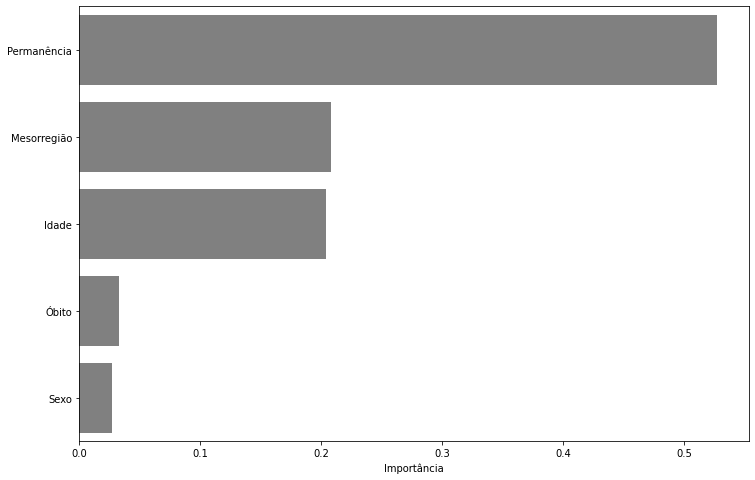

In [ ]:
#random forest

x_train, x_test, y_train, y_test = train_test_split(x_2010, y_2010, test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model  = RandomForestClassifier()
model.fit(x_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=x.columns)
fig = sns.barplot(x=importances, y=importances.index, orient='h', 
                 color='gray', order=['DIAS_PERM','MESO','years_old','MORTE','SEXO'])
plt.xlabel("Importância")
plt.yticks(np.arange(5),['Permanência','Mesorregião','Idade','Óbito','Sexo'])
fig.figure.set_size_inches(12, 8);

para 2019

In [ ]:
metrica = []

cv = StratifiedKFold(n_splits = 5, shuffle = True)

pip1 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('LR', LogisticRegression())
])
validation1 = cross_val_score(pip1, x_2019, y_2019, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip1, x_2019, y_2019, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip2 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('NB', GaussianNB())
])
validation1 = cross_val_score(pip2, x_2019, y_2019, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip2, x_2019, y_2019, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

pip3 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('RFC', RandomForestClassifier())
])
validation1 = cross_val_score(pip3, x_2019, y_2019, cv = cv, scoring='accuracy')
validation2 = cross_val_score(pip3, x_2019, y_2019, cv = cv, scoring='recall')

metrica.append({'Accuracy': np.mean(validation1),
                'Recall': np.mean(validation2)})

In [ ]:
models = ['RegressãoLogística','NaiveBayes','RandomForest','DecisionTree'] #criando label

for model, metricas in zip(models, metrica):
    print(model, ':', metricas)

RegressãoLogística : {'Accuracy': 0.6851485230163986, 'Recall': 0.09606825394511107}
NaiveBayes : {'Accuracy': 0.4844397067134295, 'Recall': 0.893641166207396}
RandomForest : {'Accuracy': 0.7153822645545765, 'Recall': 0.43418043263786626}


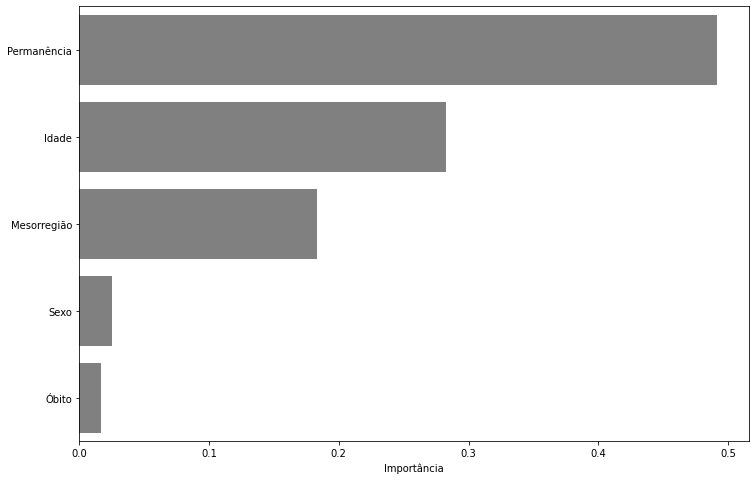

In [ ]:
#random forest

x_train, x_test, y_train, y_test = train_test_split(x_2019, y_2019, test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model  = RandomForestClassifier()
model.fit(x_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=x.columns)
fig = sns.barplot(x=importances, 
                 y=importances.index, orient='h',color='gray', order=['DIAS_PERM','years_old','MESO','SEXO','MORTE'])
plt.xlabel("Importância")
plt.yticks(np.arange(5),['Permanência','Idade','Mesorregião','Sexo','Óbito'])

fig.figure.set_size_inches(12, 8)


In [ ]:
grafico1 = df[['ANO_CMPT','ICSAP']]
grafico1.set_index('ANO_CMPT')

,ICSAP
ANO_CMPT,
2010,1.0
2010,1.0
2010,1.0
2010,1.0
2010,1.0
...,...
2019,0.0
2019,0.0
2019,0.0


In [ ]:
groupby = df.groupby(['ANO_CMPT', 'ICSAP']).count()['UF_ZI']
groupby

ANO_CMPT  ICSAP
2010      0.0       8017
          1.0      11672
2019      0.0       6948
          1.0       3206
Name: UF_ZI, dtype: int64